<a href="https://colab.research.google.com/github/kimanh24022001/Identify-negative-comments-on-social-networks/blob/main/Identify_negative_comments_on_social_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIỚI THIỆU NHÓM:**

Nhóm sinh viên thực hiện: NSA

- 18521144 - Nguyễn Hữu Nghĩa

- 18521353 - Trần Ngọc Sương

- 20521072 - Nguyễn Thị Kim Anh

# **NỘI DUNG BÁO CÁO:**

- **1:** Giới thiệu bài toán

- **2:** Import thư viện và dataset

- **3:** Khám phá dữ liệu

- **4, 5, 6, 7:** Làm sạch dữ liệu: loại bỏ dấu câu, stop words và tách từ (tokennization)

- **8:** Giới thiệu về Naive Bayes classifiers

- **9:** Train model với Naive Bayes Classifier

- **10:** Đánh giá model đã train

# **1. BÀI TOÁN**
- **Mô tả bài toán:** Nhận diện và tự động gán nhãn bình luận tích cực hay tiêu cực trên mạng xã hội.
  - Input: Một câu tiếng Anh
  - Output: Nhãn tính cực hay tiêu cực của câu đó

![image.png](https://i.imgur.com/e0HASkB.png)

- **Lí do chọn đề tài:** Mạng xã hội ngày càng phát triển, ảnh hưởng rất lớn tới đời sống hiện tại của nhiều người, có một bộ phận người dùng kém văn minh, hay chia sẻ những điều tiêu cực, mang ý thù địch (phân biệt chủng tộc, phân biết giới tính,...) trên mạng xã hội, gây ảnh hưởng rất nhiều tới người khác. Cần có biện pháp để có thể phát hiện và loại bỏ sớm những chia sẻ không tốt này trên mạng xã hội.

![image.png](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fspecials-images.forbesimg.com%2Fdam%2Fimageserve%2F865651234%2F960x0.jpg%3Ffit%3Dscale)

- **Ứng dụng thực tiễn:** 
  - Sử dụng để tự động phân loại bình luận, chia sẻ trên các nền tảng mạng xã hội thông dụng như Twitters, Facebook,... giúp các nền tảng mạng xã hội dễ dàng quản lý nội dung chia sẻ từ người dùng.
  - Tự động phân loại các review sản phẩm,...
- **Mô tả tập dữ liệu:** Tập dữ liệu chứa các câu tweets được gán nhãn được cung cấp từ API chính chủ của Twitters dựa trên báo cáo đóng góp từ cộng đồng.
  - 31962 câu tweets tiếng Anh thô được gãn hai nhãn. 0: tích cực ; 1: tiêu cực.

# **2. IMPORT THƯ VIỆN VÀ DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load data
tweets_df = pd.read_csv('/content/drive/MyDrive/NLP/twitter.csv')
tweets_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# **3. KHÁM PHÁ DỮ LIỆU**

Đầu tiên ta có cái nhìn tổng quan về bộ dữ liệu

In [ ]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
tweets_df = tweets_df.drop(['id'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a2243f3d0>]],
      dtype=object)

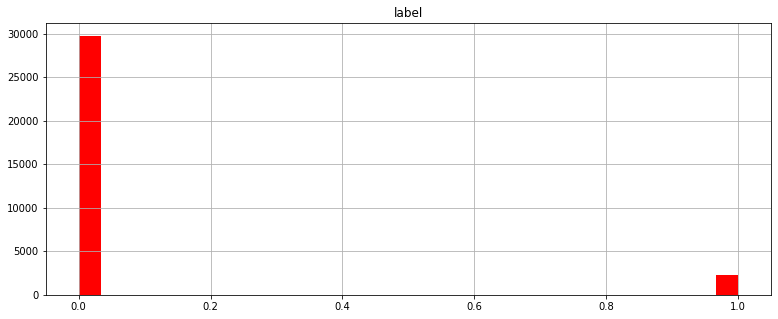

In [ ]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [ ]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [ ]:
tweets_df

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67


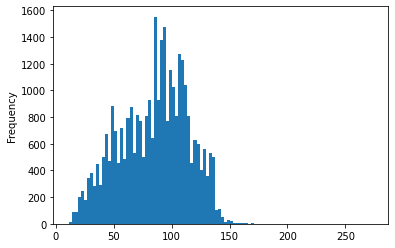

In [ ]:
tweets_df['length'].plot(bins=100, kind='hist')

In [ ]:
positive = tweets_df[tweets_df['label']==0]

In [ ]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [ ]:
negative = tweets_df[tweets_df['label']==1]

In [ ]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...,59
31946,1,@user omfg i'm offended! i'm a mailbox and i'...,82
31947,1,@user @user you don't have the balls to hashta...,112
31948,1,"makes you ask yourself, who am i? then am i a...",87


# **3.1 PLOT WORDCLOUD**

In [ ]:
sentences = tweets_df['tweet'].tolist()

In [ ]:
len(sentences)

31962

In [ ]:
m_sentences = " ".join(sentences)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

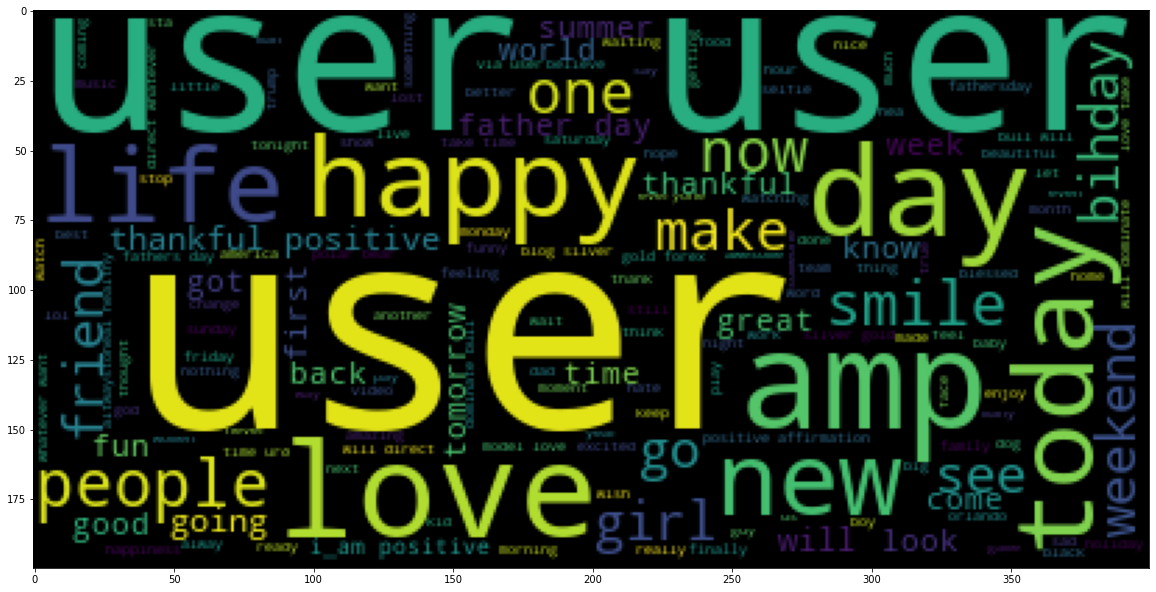

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(m_sentences))



---


**Có thể thấy bộ dữ liệu của chúng ta chưa sạch, và điều này ảnh hưởng đến quá trình train model. Chúng ta cần phải có các bước tiền xử lý dữ liệu.**

# **4. LÀM SẠCH DỮ LIỆU: LOẠI BỎ CÁC DẤU CÂU**

Dấu câu và một số ký tự không cần thiết cho quá trình train model. Ngoài ra có thể dẫn đến sai lệch trong quá trình train, ví dụ "hot!" và "hot" sẽ được tính là khác nhau, ảnh hướng đến quá trình train.

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
temp = 'Hi :) My name is NHN. Hope today is good !!!'

In [ ]:
temp = [char for char in temp if char not in string.punctuation]

In [ ]:
f_temp = "".join(temp)
f_temp

'Hi  My name is NHN Hope today is good '

# **5. LÀM SẠCH DỮ LIỆU: LOẠI BỎ STOPWORD**

Stop-word là những từ không mang nhiều ý nghĩa nhưng xuất hiện khá nhiều, làm loãng dữ liệu, cần loại bỏ.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
f_temp = [w for w in f_temp.split() if w.lower() not in stopwords.words('english')]

In [ ]:
f_temp

['Hi', 'name', 'NHN', 'Hope', 'today', 'good']

# **6. TOKENNIZATION**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data = ['This is the first paper paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray())

[[0 0 1 1 0 2 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# **8. KẾT HỢP CÁC BƯỚC TRÊN**

In [ ]:
from os import remove
# (1) remove punction, (2) remove stopwords

def comment_cleaning(comment):
  remove_punc = [char for char in comment if char not in string.punctuation]
  remove_punc = "".join(remove_punc)

  remove_punc_clean = [w for w in remove_punc.split() if w.lower() not in stopwords.words('english')]

  return remove_punc_clean

In [ ]:
tweets_df['tweet'][22]

"product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!"

In [ ]:
# Apply function
tweets_df_clean = tweets_df['tweet'].apply(comment_cleaning)

In [ ]:
print(tweets_df_clean[22])

['product', 'day', 'happy', 'man', 'wine', 'tool', 'whos', 'weekend', 'time', 'open', 'amp', 'drink']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = comment_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [ ]:
tweets_countvectorizer.shape

(31962, 47386)

In [ ]:
X = tweets_countvectorizer

In [ ]:
y = tweets_df['label']

# **10. TRAIN NAIVE BAYES CLASSIFIER MODEL**

In [ ]:
X.shape

(31962, 47386)

In [ ]:
y.shape

(31962,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# **11. EVALUATE MODEL**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_test = NB_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)

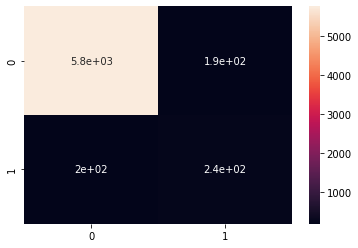

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5959
           1       0.56      0.55      0.55       434

    accuracy                           0.94      6393
   macro avg       0.76      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393



In [ ]:
import pickle

In [ ]:
filename = 'twitter_model.sav'
pickle.dump(NB_classifier, open(filename, 'wb'))